# Activity 3.3 - CNN Network Architectures

Submitted By: Labbao, Benedick D.<br>
Performed On: 03/05/2024<br>
Submitted On: 03/11/2024

Submitted To: Engr. Roman M. Richard

---

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [10]:
# install opencv if you haven't
# %pip install opencv-python
# %pip install pillow
%pip install scipy

In [11]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from matplotlib.pyplot import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [12]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [34]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [66]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

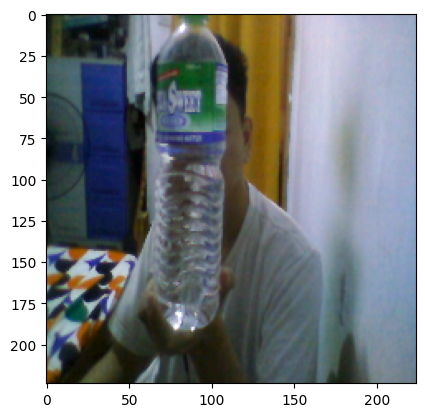

In [67]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [ ]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Create a function to load model, image, preprocess input and targets

In [57]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [68]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n04557648,water_bottle,0.429165
1,n03983396,pop_bottle,0.103685
2,n03825788,nipple,0.041276
3,n03868863,oxygen_mask,0.037075
4,n02815834,beaker,0.035149
5,n03062245,cocktail_shaker,0.023002
6,n04525305,vending_machine,0.018880
7,n04462240,toyshop,0.014806
8,n02823750,beer_glass,0.014307
9,n02823428,beer_bottle,0.012180


Interpret the result of prediction using VGG16 model

The result of the prediction shows the predicted classes with the probability and the predicted class with the highest probability is the correct class. The probability had a huge difference between the first predicted class and the next predicted class.

Use Resnet50 pretrained model

In [ ]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Predict the result

In [70]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 3s 3s/step


,Predicted Class,Name,Probability
0,n04557648,water_bottle,0.627099
1,n03983396,pop_bottle,0.132336
2,n04591713,wine_bottle,0.018024
3,n02823428,beer_bottle,0.014977
4,n04560804,water_jug,0.012613
5,n03443371,goblet,0.011569
6,n02823750,beer_glass,0.011346
7,n03916031,perfume,0.007098
8,n03825788,nipple,0.006877
9,n01770393,scorpion,0.006133


This time using the RESNET50 model, the probability of the correct predicted class which is the water_bottle is higher than the VGG16 model. The RESNET50 model performed better than the VGG16 despite being smaller in size.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

##### Models

In [104]:
from keras.applications import MobileNetV2, DenseNet201, NASNetMobile

In [ ]:
mobilenetv2_model = MobileNetV2(weights='imagenet')

mobilenetv2_model.summary()

In [ ]:
densenet_model = DenseNet201(weights='imagenet')

densenet_model.summary()

In [ ]:
nasnet_model = NASNetMobile(weights='imagenet')

nasnet_model.summary()

##### Prediction Comparison

In [103]:
from keras.applications import mobilenet_v2, densenet, nasnet

In [83]:
predict_image(mobilenetv2_model, img_path, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions)

1/1 [==============================] - 6s 6s/step


,Predicted Class,Name,Probability
0,n04557648,water_bottle,0.752543
1,n03983396,pop_bottle,0.094169
2,n07880968,burrito,0.014114
3,n03124043,cowboy_boot,0.005675
4,n03825788,nipple,0.003857
5,n03443371,goblet,0.003215
6,n03000247,chain_mail,0.002352
7,n04525305,vending_machine,0.002140
8,n03916031,perfume,0.002123
9,n04200800,shoe_shop,0.002114


In [87]:
predict_image(densenet_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 [==============================] - 21s 21s/step


,Predicted Class,Name,Probability
0,n04557648,water_bottle,0.965988
1,n03983396,pop_bottle,0.032568
2,n03825788,nipple,0.000294
3,n04560804,water_jug,0.000271
4,n02823428,beer_bottle,0.000225
5,n04131690,saltshaker,0.000081
6,n02823750,beer_glass,0.000071
7,n02815834,beaker,0.000070
8,n03443371,goblet,0.000054
9,n03062245,cocktail_shaker,0.000049


In [96]:
predict_image(nasnet_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions)

1/1 [==============================] - 17s 17s/step


,Predicted Class,Name,Probability
0,n04557648,water_bottle,0.822984
1,n03983396,pop_bottle,0.140471
2,n02823428,beer_bottle,0.010664
3,n04560804,water_jug,0.004253
4,n02877765,bottlecap,0.001314
5,n04131690,saltshaker,0.001290
6,n02823750,beer_glass,0.000930
7,n02815834,beaker,0.000698
8,n03825788,nipple,0.000615
9,n04591713,wine_bottle,0.000546


All the models that we used has more that 70% probability in predicting water_bottle, densenet has achieved the highest probability and while the other models are smaller than densenet, they still had good results. These model are good when you have size limitations on the machine that you want to deploy.

#### Conclusion

In this activity, we performed various CNN Network architectures, we can see that progress on how they each has been fine-tuned to perform with higher accuracy despite having fewer parameters.